## Final Project

### Analysis of features extarcted from audio data

- link to dataset:

### Motivation and Goals

The goal of this project is to clasdify voice recoridngs as either male of female, based on numerical features extracted from the Mozilla common voice dataset.
The purpose of this project is ...


In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer   
from sklearn.compose import make_column_selector

from sklearn.linear_model import LogisticRegression

import playsound
import winsound


## Data Loading

In [6]:
with open("./data/data.csv", "r") as file:
    data_raw = pd.read_csv(file)

data_raw.head()

path  \
0  ./clips/common_voice_en_40187705.mp3   
1  ./clips/common_voice_en_40187697.mp3   
2  ./clips/common_voice_en_40187695.mp3   
3  ./clips/common_voice_en_40187693.mp3   
4  ./clips/common_voice_en_40187696.mp3   

                                            sentence sentence_domain      age  \
0  Any new copies were initialized with a success...             NaN  fifties   
1        He then led the life of a wandering hermit.             NaN  fifties   
2  Artume appeared as a recurring character in Ma...             NaN  fifties   
3  Cohousing cultivates a culture of sharing and ...             NaN  fifties   
4  In practice however the resistive element vari...             NaN  fifties   

           gender           accents  mfcc_01_mean  mfcc_02_mean  mfcc_03_mean  \
0  male_masculine  Canadian English   -449.487457    119.852509      7.753420   
1  male_masculine  Canadian English   -494.584290    125.826019     18.260662   
2  male_masculine  Canadian English   -503.006805    131.359589     15.189734   
3  male_masculine  Canadian English   -466.040344    111.497826      7.834814   
4  male_masculine  Canadian English   -473.256073    116.954979     12.820942   

   mfcc_04_mean  ...  spec_contrast_band_4_std  spec_contrast_band_5_std  \
0     30.211107  ...                  4.427589                  3.374920   
1     23.508959  ...                  4.600072                  4.264892   
2     18.775719  ...                  4.263854                  6.058417   
3     21.756237  ...                  4.760368                  4.768118   
4     26.763842  ...                  4.252196                  4.170021   

   spec_contrast_band_6_std  spec_contrast_band_7_std  spec_rolloff_mean  \
0                  8.790948                  4.794475        4491.619810   
1                  7.531223                  4.263827        4458.521793   
2                  6.529373                  3.953812        4289.709689   
3                  6.406526                  3.485832        4421.248209   
4                  5.473282                  3.982934        4656.431159   

   spec_rolloff_std  zcr_mean   zcr_std  rmse_mean  rmse_std  
0       2971.032386  0.078209  0.080991   0.021588  0.023391  
1       2792.566125  0.061128  0.059886   0.016811  0.020808  
2       2843.069699  0.067131  0.057595   0.013110  0.014007  
3       2540.725526  0.072797  0.060684   0.015802  0.019355  
4       2868.399050  0.082116  0.086288   0.016562  0.018280  

[5 rows x 94 columns]

In [7]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45358 entries, 0 to 45357
Data columns (total 94 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   path                       45358 non-null  object 
 1   sentence                   45358 non-null  object 
 2   sentence_domain            384 non-null    object 
 3   age                        44929 non-null  object 
 4   gender                     45358 non-null  object 
 5   accents                    38582 non-null  object 
 6   mfcc_01_mean               45358 non-null  float64
 7   mfcc_02_mean               45358 non-null  float64
 8   mfcc_03_mean               45358 non-null  float64
 9   mfcc_04_mean               45358 non-null  float64
 10  mfcc_05_mean               45358 non-null  float64
 11  mfcc_06_mean               45358 non-null  float64
 12  mfcc_07_mean               45358 non-null  float64
 13  mfcc_08_mean               45358 non-null  flo

In [8]:
# Sentence domain column has less than 400 rows
# Null values in columns accents and age

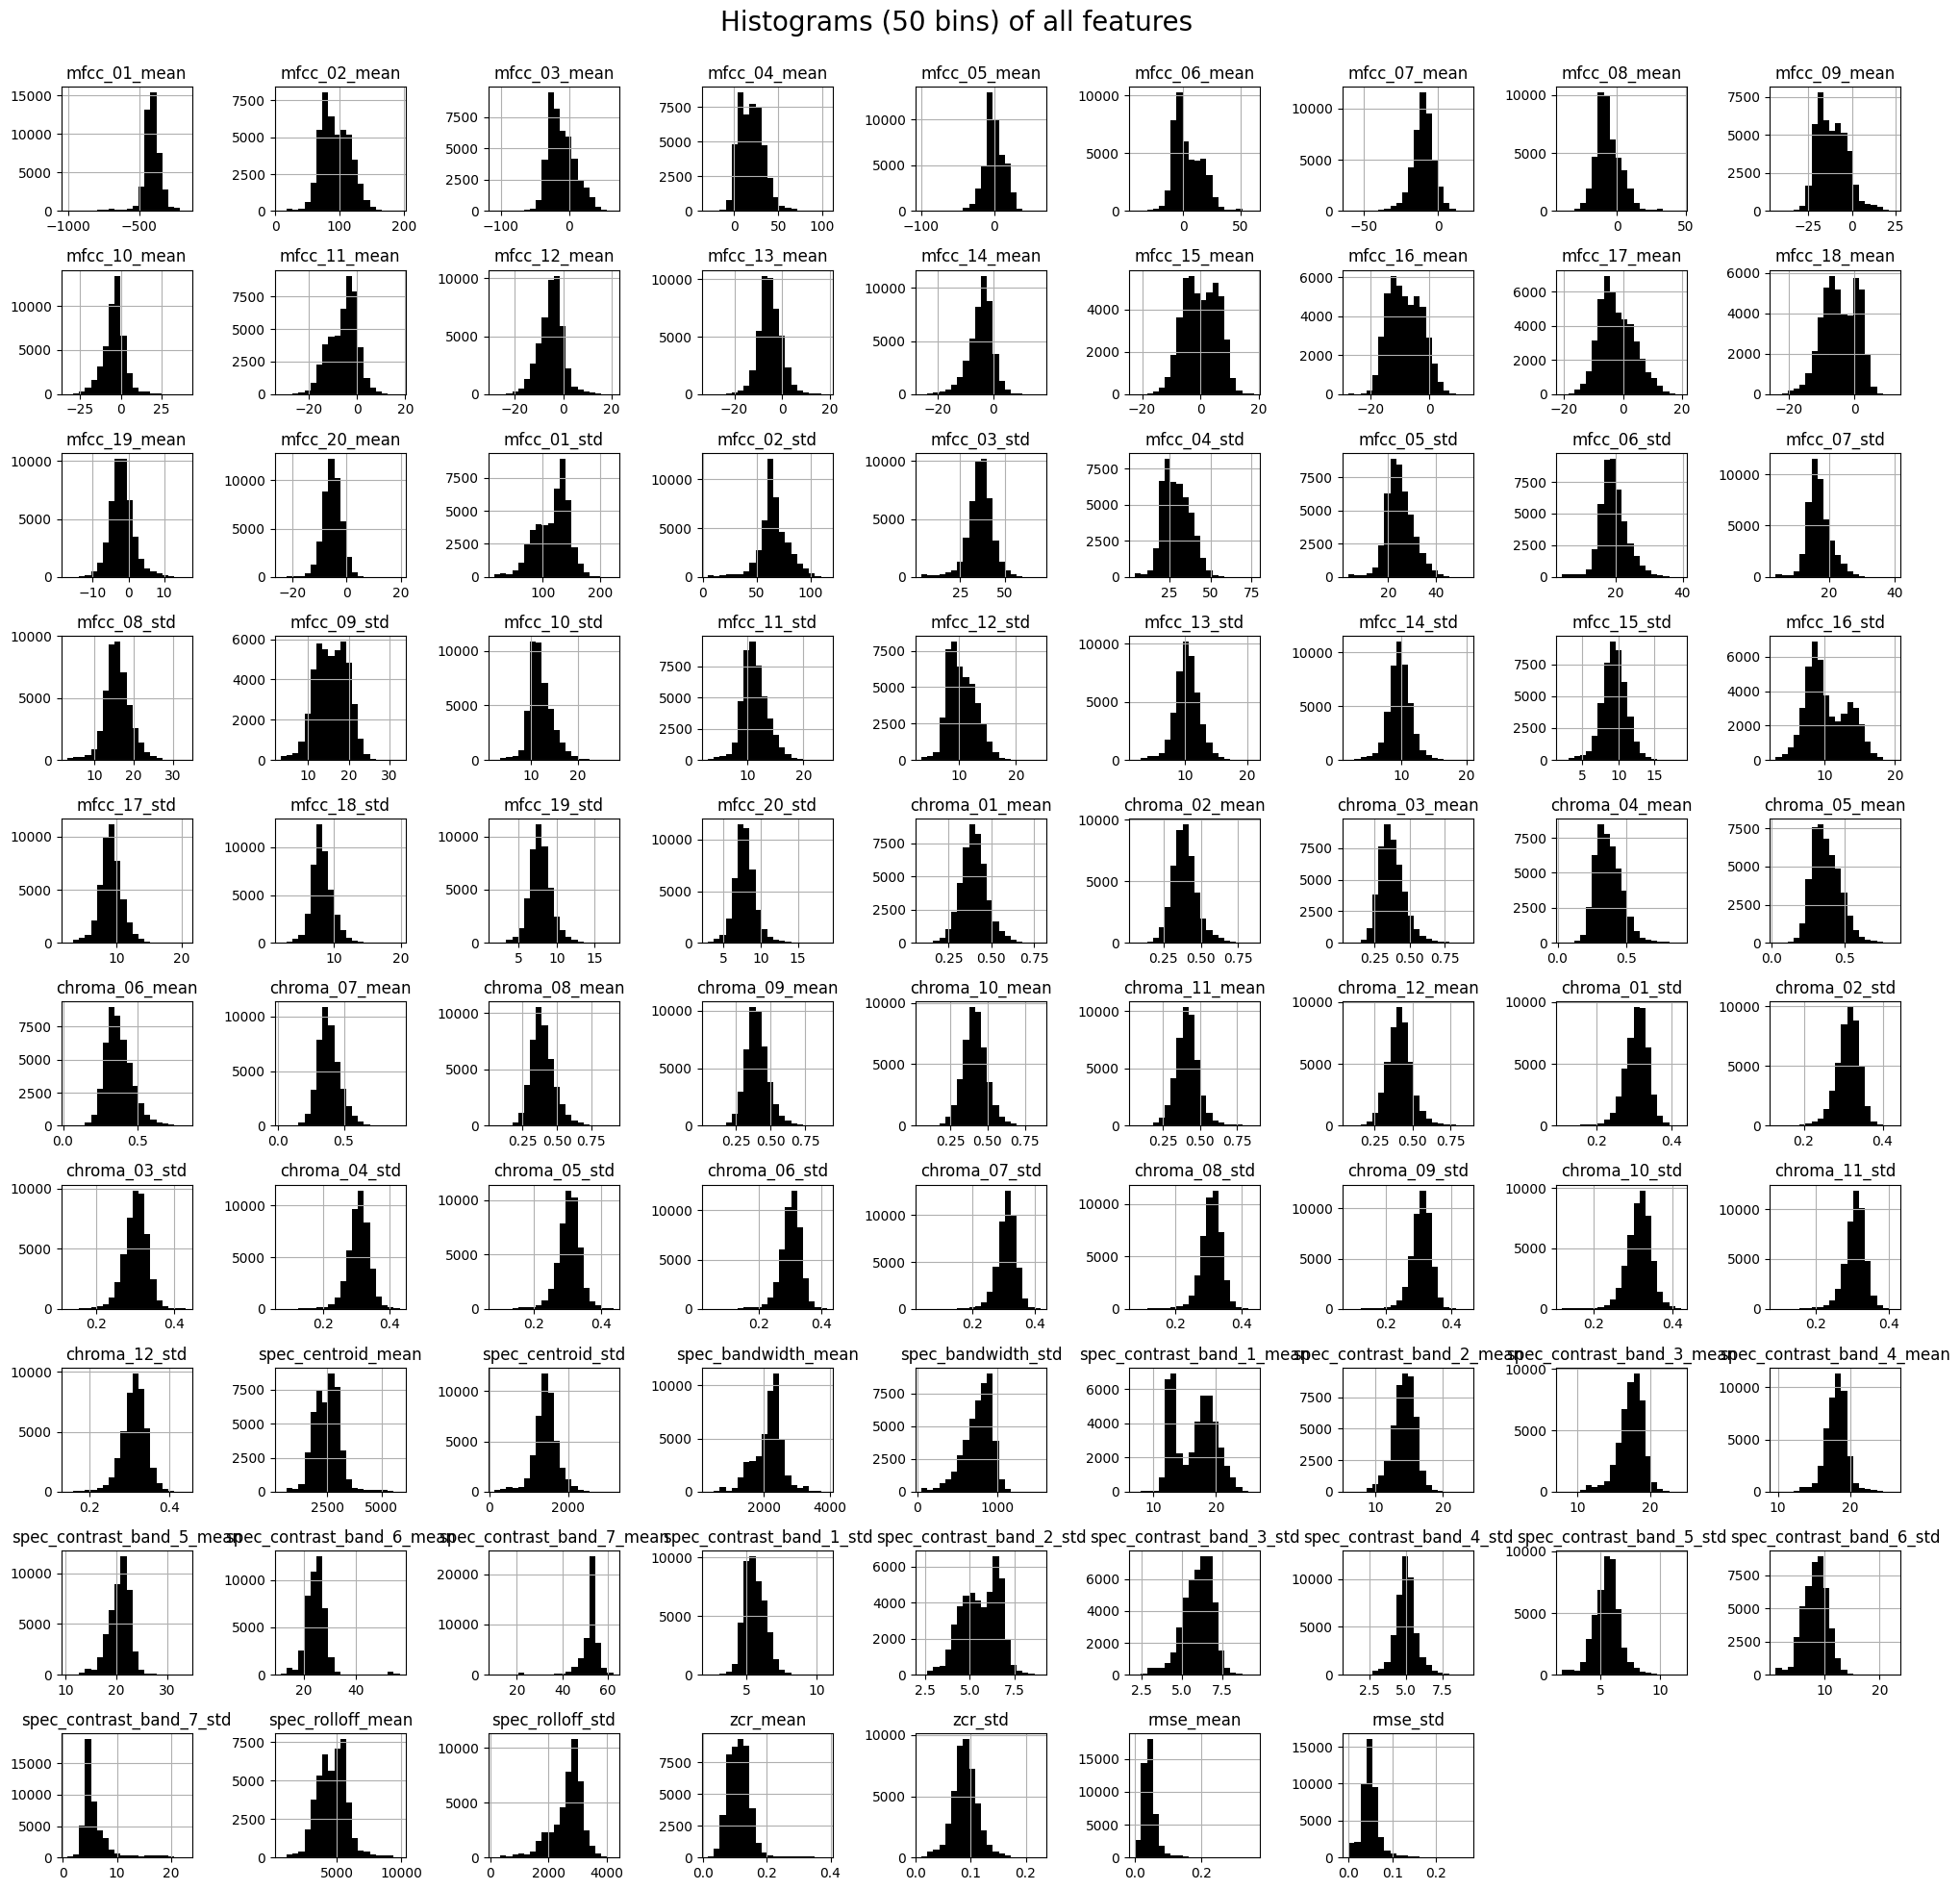

In [9]:
def histograms(data):
    """
    Function to plot histograms of the dataframe
    :param data: DataFrame
    :return: None
    """
    data.hist(figsize=(20, 20), bins=20, color='black')
    plt.suptitle('Histograms (50 bins) of all features', fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()
histograms(data_raw)

In [10]:
# drop sentence_domain
try:
    data_raw = data_raw.drop(columns=["sentence_domain"])
except:
    print("Column sentence_domain dropped")

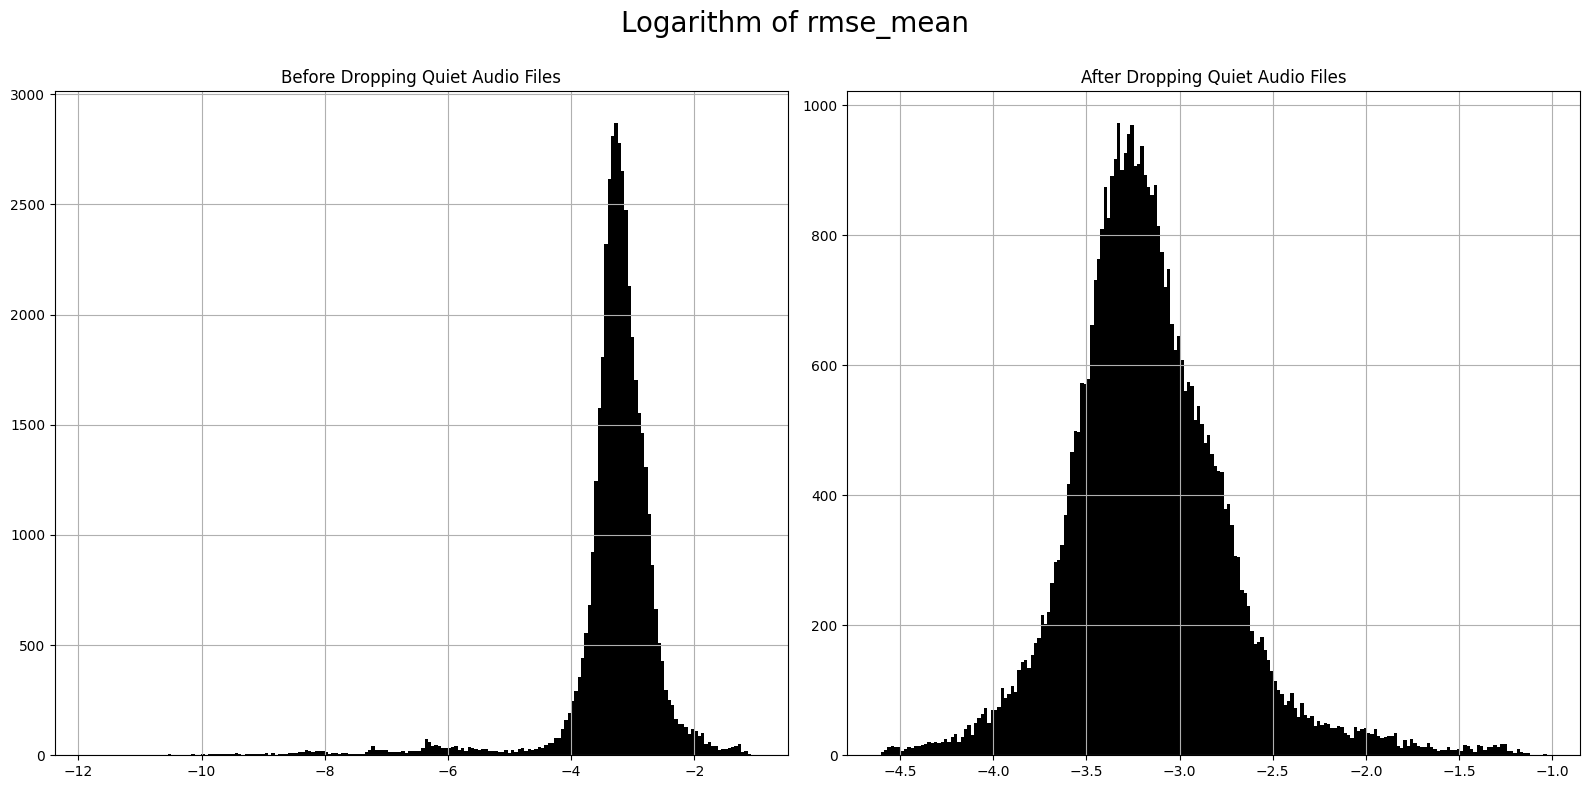

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# First histogram
np.log(data_raw['rmse_mean']).hist(bins=200, ax=axes[0], color='black')
axes[0].set_title('Before Dropping Quiet Audio Files')

# Dropping quiet audio files
bool_mask_quiet = data_raw["rmse_mean"] < 0.01
data_raw = data_raw[~bool_mask_quiet]

# Second histogram
np.log(data_raw['rmse_mean']).hist(bins=200, ax=axes[1], color='black')
axes[1].set_title('After Dropping Quiet Audio Files')

plt.suptitle('Logarithm of rmse_mean', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


In [12]:
# Data frames 
y= data_raw["gender"]
X= data_raw.drop(columns=["gender"])

# Train test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.3, random_state= 7)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size = 0.5, random_state= 7)

# Df only for EDA
df_eda = X_train.copy()
df_eda['y'] = y_train
df_eda_cat = df_eda.select_dtypes(include=['object'])
df_eda_num = df_eda.select_dtypes(include=['number'])

# Drop columns that are not needed
X_train= X_train.drop(columns=["path", "age", "sentence", "accents"])
X_test = X_test.drop(columns=["path", "age", "sentence", "accents"])
X_val = X_val.drop(columns=["path", "age", "sentence", "accents"])




## EDA

In [13]:
df_eda.describe()

mfcc_01_mean  mfcc_02_mean  mfcc_03_mean  mfcc_04_mean  mfcc_05_mean  \
count  30445.000000  30445.000000  30445.000000  30445.000000  30445.000000   
mean    -402.581308     93.878845    -10.933716     18.458747      0.538358   
std       50.233211     21.862922     19.077136     12.964804     13.017963   
min     -613.467285     18.975710   -109.845596    -28.177692    -99.547256   
25%     -434.004364     76.708931    -25.447159      7.823236     -7.346353   
50%     -408.643280     91.196671    -14.506579     18.037382     -1.117860   
75%     -375.335510    110.456169      1.147113     27.762941      9.742210   
max     -166.984146    182.529617     58.045757     87.805878     54.488266   

       mfcc_06_mean  mfcc_07_mean  mfcc_08_mean  mfcc_09_mean  mfcc_10_mean  \
count  30445.000000  30445.000000  30445.000000  30445.000000  30445.000000   
mean       3.242599    -10.089679     -6.543163    -11.304899     -4.176045   
std       11.697780      7.311724      8.380279      8.612020      6.067768   
min      -42.214890    -58.264080    -39.346924    -43.236217    -32.694038   
25%       -5.517272    -14.092616    -11.937893    -18.176949     -7.358288   
50%        0.271217     -9.760345     -7.704925    -12.278936     -3.458446   
75%       12.419271     -5.755917     -1.390913     -5.358039     -0.559900   
max       62.071381     19.852123     46.526283     23.842554     30.489866   

       ...  spec_contrast_band_4_std  spec_contrast_band_5_std  \
count  ...              30445.000000              30445.000000   
mean   ...                  5.061871                  5.605906   
std    ...                  0.648148                  0.979990   
min    ...                  2.939495                  2.272468   
25%    ...                  4.642302                  4.972534   
50%    ...                  5.034340                  5.623589   
75%    ...                  5.402566                  6.173224   
max    ...                  9.229922                 11.747129   

       spec_contrast_band_6_std  spec_contrast_band_7_std  spec_rolloff_mean  \
count              30445.000000              30445.000000       30445.000000   
mean                   8.543545                  6.049191        4563.602412   
std                    2.009144                  2.833037        1068.103613   
min                    2.105536                  2.065034         757.661011   
25%                    7.084447                  4.549751        3796.428571   
50%                    8.588334                  5.128155        4612.233709   
75%                    9.940059                  6.478607        5355.723684   
max                   20.395255                 22.756141        9069.624607   

       spec_rolloff_std      zcr_mean       zcr_std     rmse_mean  \
count      30445.000000  30445.000000  30445.000000  30445.000000   
mean        2672.988716      0.111345      0.090609      0.046797   
std          493.047162      0.032612      0.022152      0.027724   
min          437.884243      0.016085      0.010137      0.010001   
25%         2440.613012      0.087287      0.077037      0.032693   
50%         2781.610341      0.110934      0.089554      0.040583   
75%         2989.746736      0.132500      0.103279      0.052819   
max         4217.979050      0.355671      0.226764      0.357266   

           rmse_std  
count  30445.000000  
mean       0.052761  
std        0.024791  
min        0.003705  
25%        0.039585  
50%        0.048662  
75%        0.059089  
max        0.271961  

[8 rows x 88 columns]

In [14]:
# comparing the means of the features using groupbys

def table_grouped_by(df, group_by_col):
    grouped_by_y = df.groupby(group_by_col).mean().T
    table = PrettyTable()
    table.field_names = ["Feature"]+list(grouped_by_y.columns)
    for feature, values in zip(grouped_by_y.index, grouped_by_y.values):
        table.add_row([feature] + values.tolist())
    table.align = "r"
    table.align["Feature"] = "l"
    table.title = "Grouped by " + group_by_col.name
    print(table)
    
table_grouped_by(df_eda_num, df_eda_cat['y'])
table_grouped_by(df_eda_num, df_eda_cat['age'])
table_grouped_by(df_eda_num, df_eda_cat['accents'])



+-------------------------------------------------------------------------+
|                               Grouped by y                              |
+---------------------------+----------------------+----------------------+
| Feature                   |      female_feminine |       male_masculine |
+---------------------------+----------------------+----------------------+
| mfcc_01_mean              |   -415.4631604495856 |    -380.060741817807 |
| mfcc_02_mean              |    83.71244225270821 |   111.65215571793134 |
| mfcc_03_mean              |  -16.258367889651886 |  -1.6249490742398012 |
| mfcc_04_mean              |   15.049459415403195 |    24.41899868412107 |
| mfcc_05_mean              |   -5.813054481061109 |   11.642150813073544 |
| mfcc_06_mean              |   -2.453347495731259 |   13.200477832846742 |
| mfcc_07_mean              |  -10.803409947636496 |   -8.841906490911672 |
| mfcc_08_mean              |   -9.239675769314287 |  -1.8290118829132427 |
| mfcc_09_me

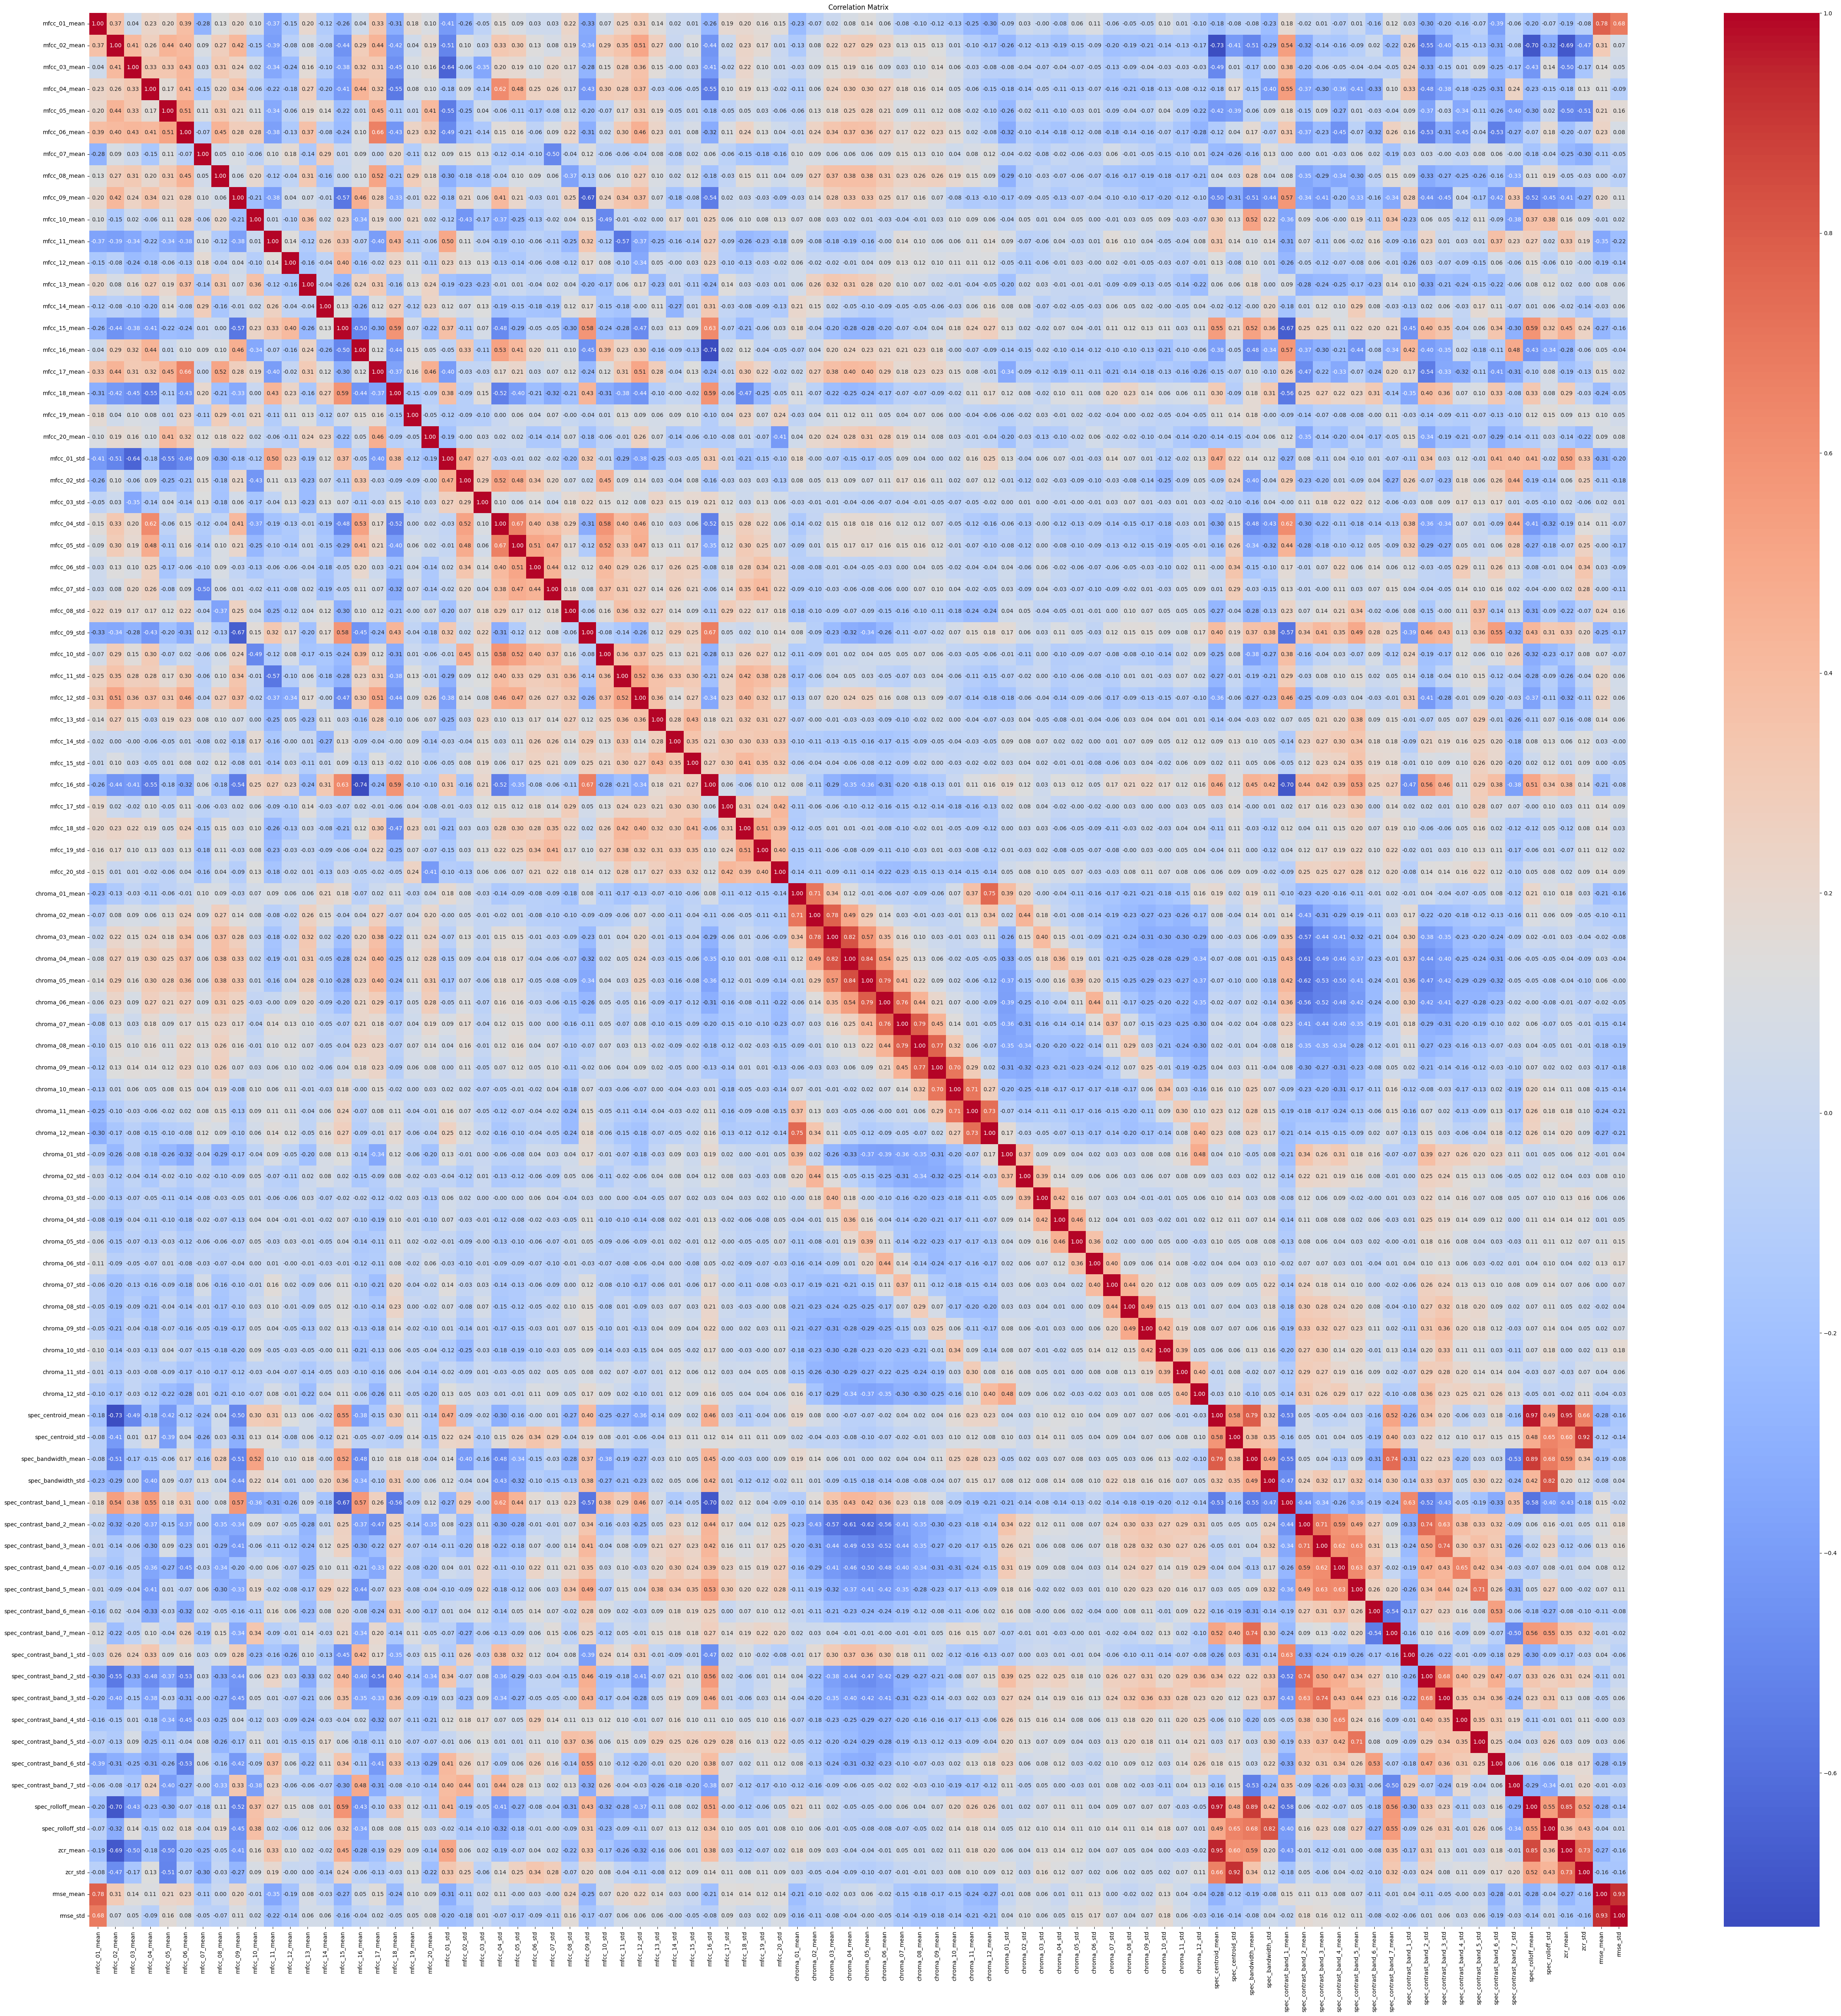

In [15]:
# Correlation Matrix (save to zoom in)

def generate_correlation_matrix(df):
    plt.figure(figsize=(50, 50))
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()
    
generate_correlation_matrix(df_eda_num)

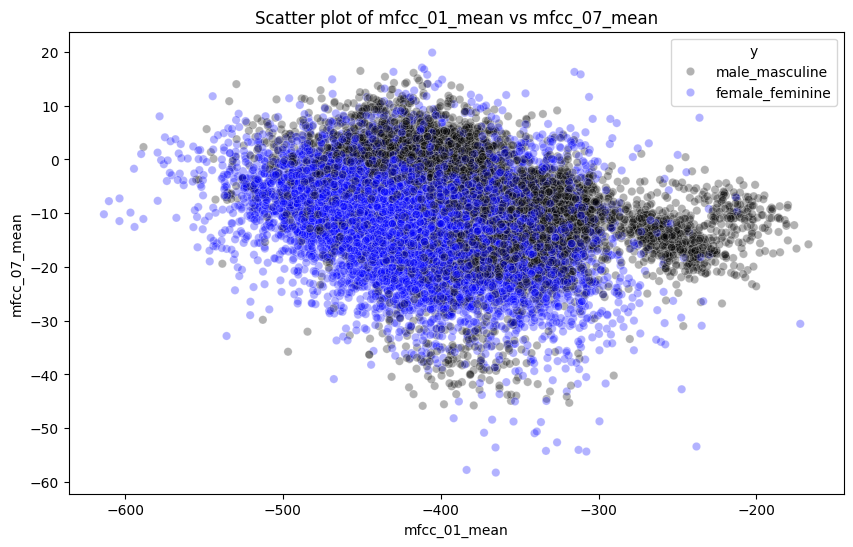

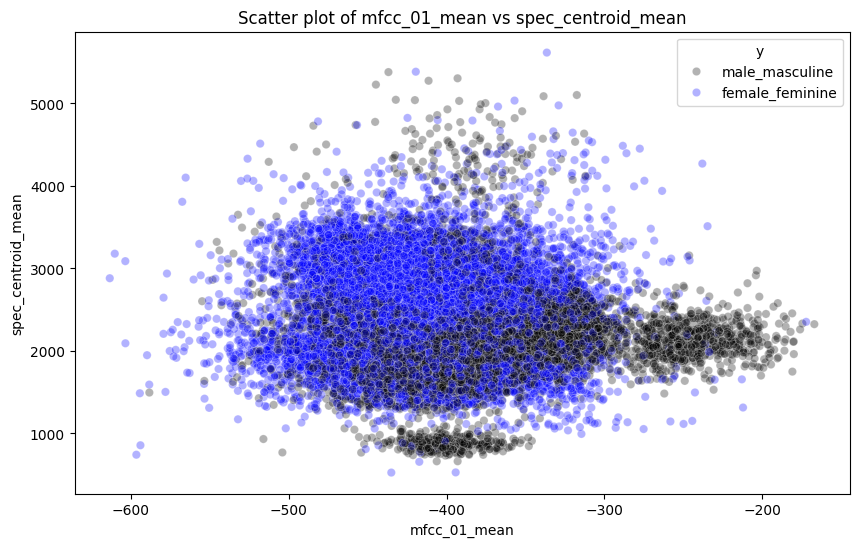

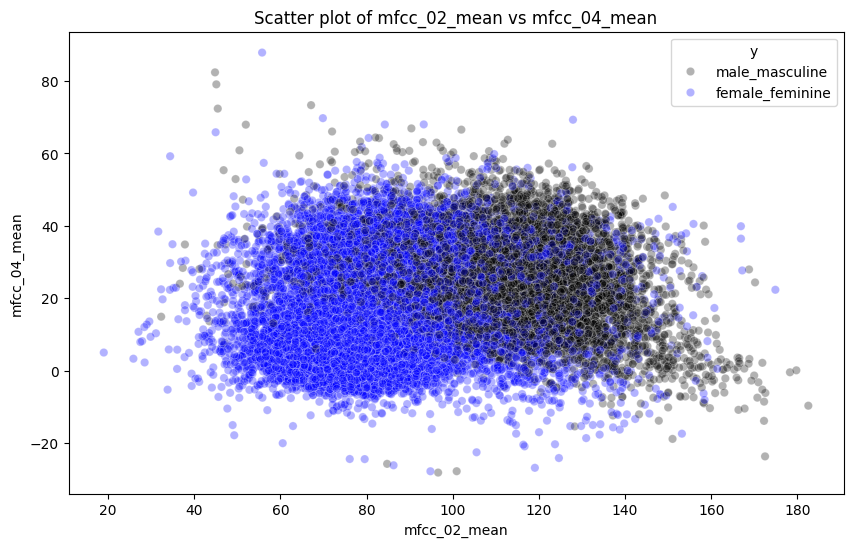

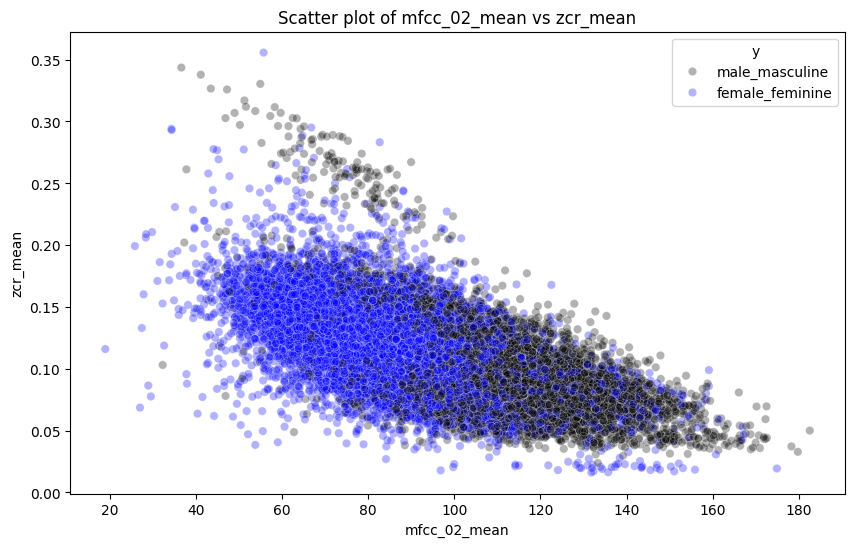

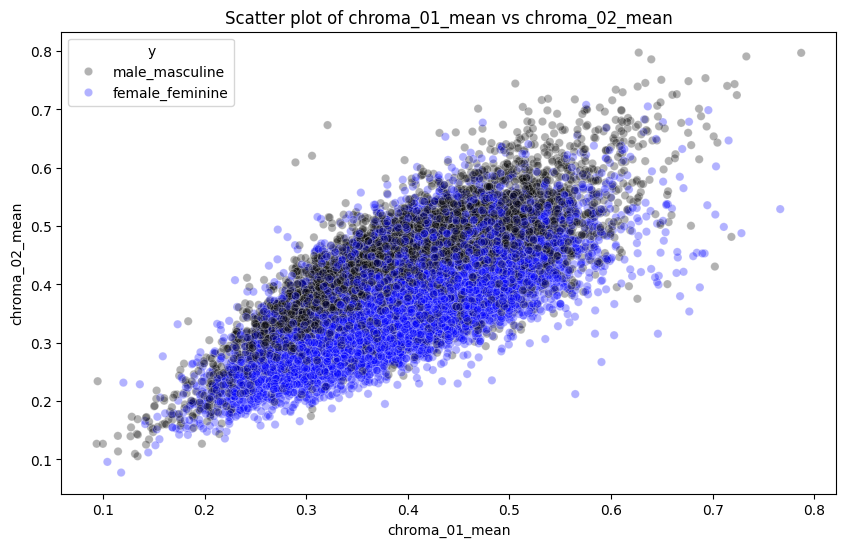

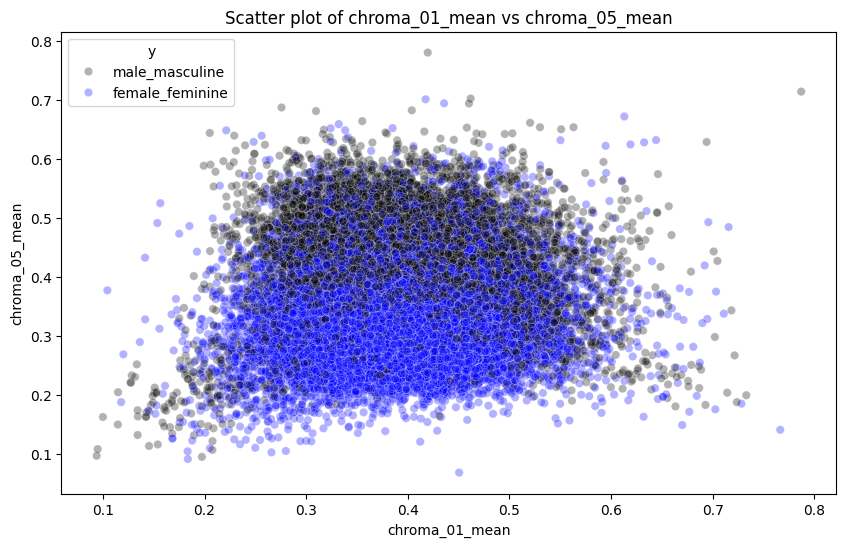

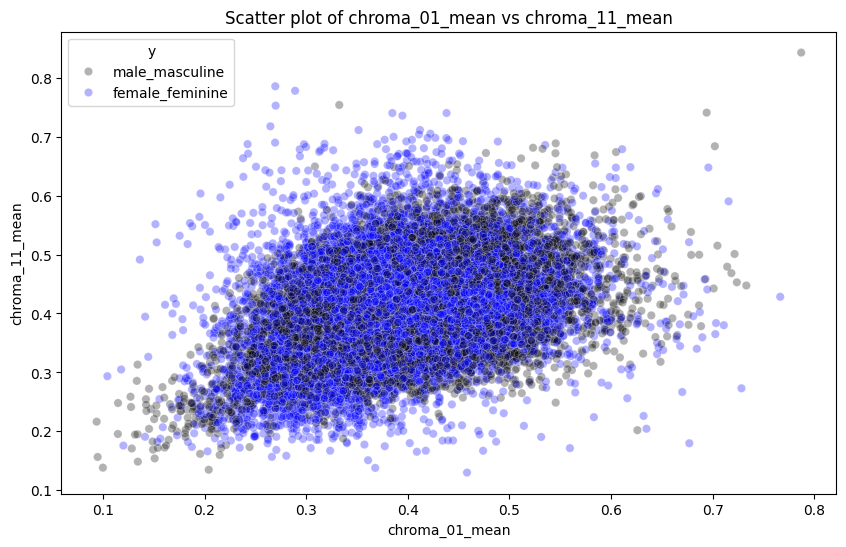

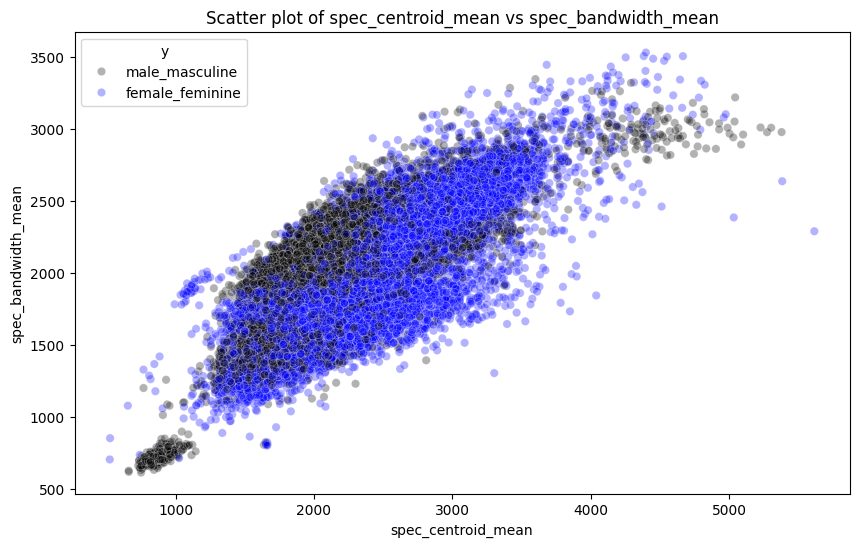

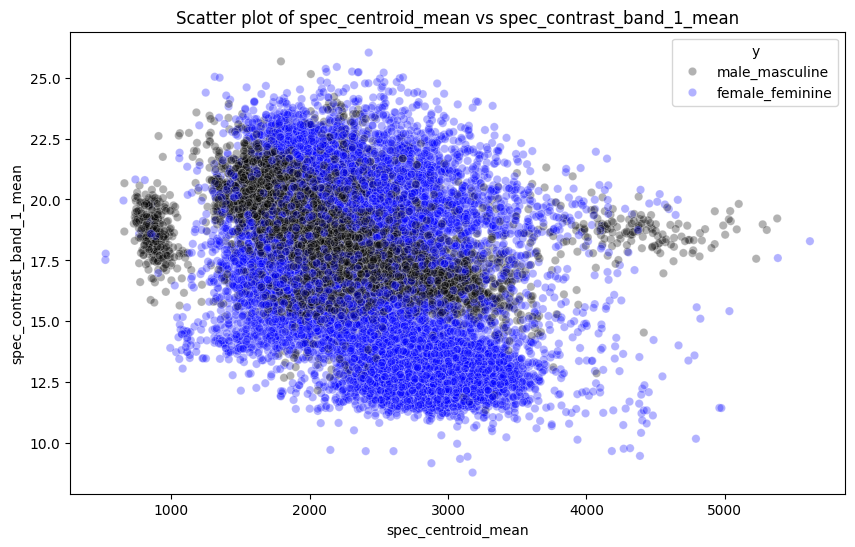

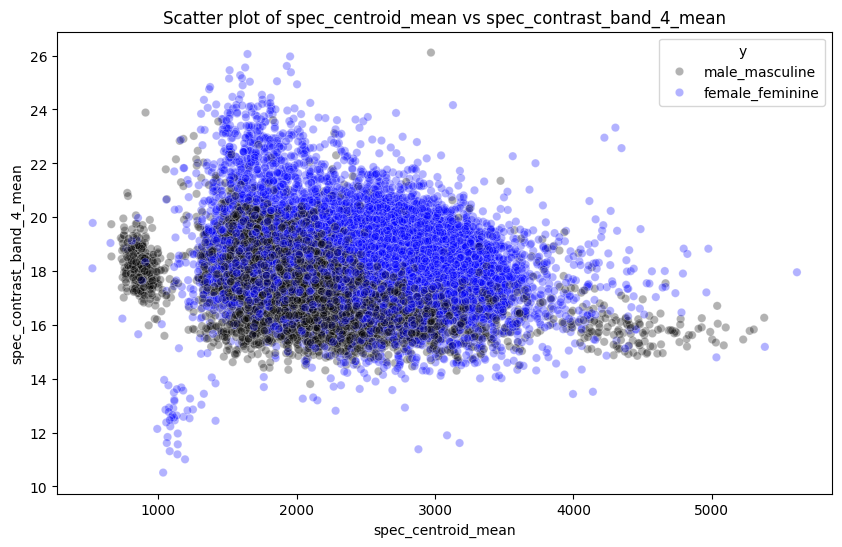

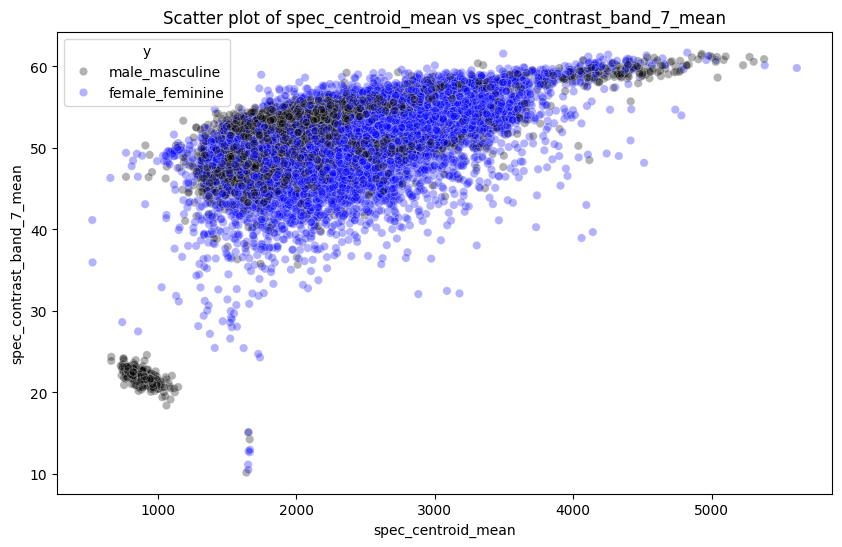

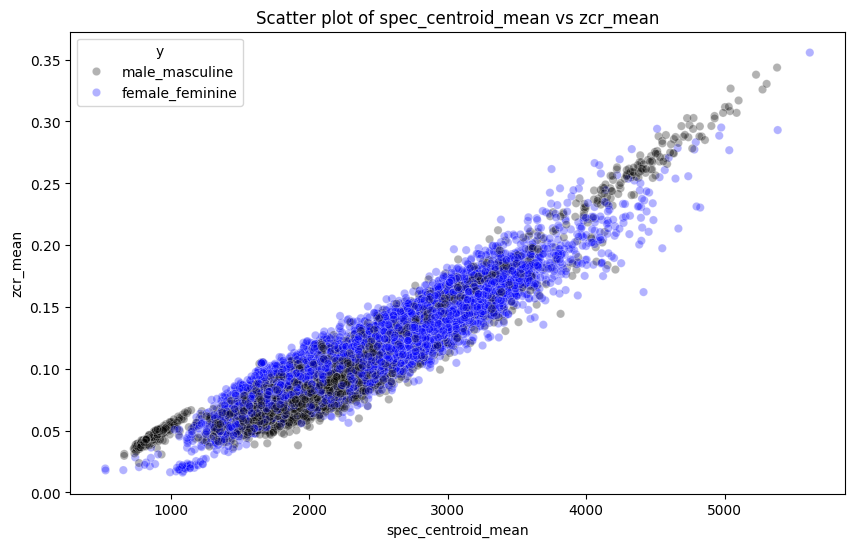

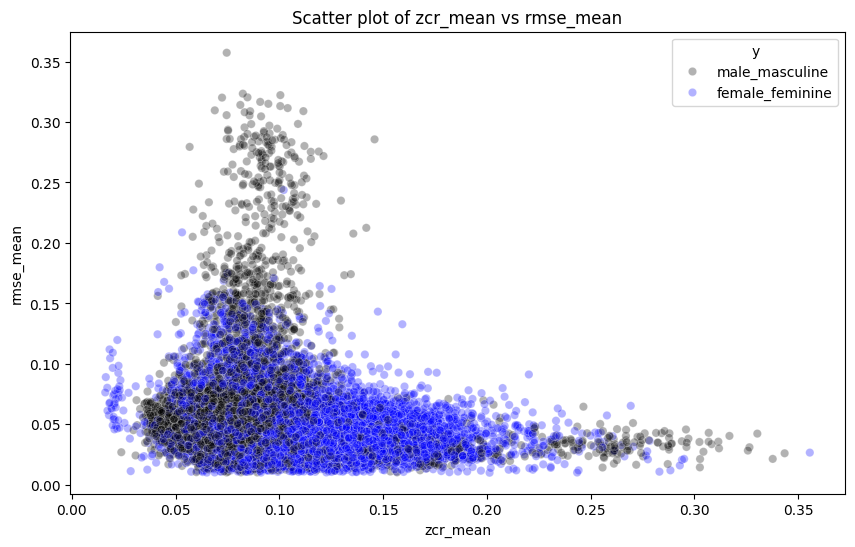

In [16]:
# scatter plots
def scatter_plot(df, x_col, y_col):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=x_col, y=y_col, hue='y', palette={'male_masculine': 'black', 'female_feminine': 'blue'}, alpha=0.3)
    plt.title(f'Scatter plot of {x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

# mfcc 
# ....mfcc not multimodal
scatter_plot(df_eda, 'mfcc_01_mean', 'mfcc_07_mean')
scatter_plot(df_eda, 'mfcc_01_mean', 'spec_centroid_mean')
# ....mfcc bimodal
scatter_plot(df_eda, 'mfcc_02_mean', 'mfcc_04_mean')
scatter_plot(df_eda, 'mfcc_02_mean', 'zcr_mean')


# chroma differences in distances
scatter_plot(df_eda, 'chroma_01_mean', 'chroma_02_mean')
scatter_plot(df_eda, 'chroma_01_mean', 'chroma_05_mean')
scatter_plot(df_eda, 'chroma_01_mean', 'chroma_11_mean')

# spectral
scatter_plot(df_eda, 'spec_centroid_mean', 'spec_bandwidth_mean')
scatter_plot(df_eda, 'spec_centroid_mean', 'spec_contrast_band_1_mean')
scatter_plot(df_eda, 'spec_centroid_mean', 'spec_contrast_band_4_mean')
scatter_plot(df_eda, 'spec_centroid_mean', 'spec_contrast_band_7_mean')
scatter_plot(df_eda, 'spec_centroid_mean', 'zcr_mean')

# temporal
scatter_plot(df_eda, 'zcr_mean', 'rmse_mean')

## Data Preprocessing

In [17]:
# data preprocessing

# TODO normalization
# TODO Log transformation
# TODO Pick apart multimodality


In [18]:
# Log transformation
def use_log1p(data, scale_by_min=False):
    '''
    Log1p transformation of the data.
    This transformation can be more beneficial than the standard log transformation 
    as it handles zero values.
    ---
    params: data: pd.Series
    return: pd.Series
    '''
    if scale_by_min:
        # Scale the data by its minimum value (smallest value will be 0)
        min = np.min(data) 
        data = data + abs(min) + 1
    assert np.min(data) >= 0, 'data contains negative values at log1p transform'
    transformed = np.log2(data)
    return transformed

# Transformer
scl = StandardScaler()
l1p = FunctionTransformer(func=use_log1p, validate=False, kw_args={'scale_by_min': True}, feature_names_out='one-to-one')

# Pipelines
pipeline_num = Pipeline(steps=[
    ('scaler', scl)
])

pipeline_l1p = Pipeline(steps=[
    ('log1p', l1p),
    ('scaler', scl)
])

# Column selection
preprocessing = ColumnTransformer([
    ('l1p', pipeline_l1p, ['mfcc_01_mean', 'mfcc_07_std', 'mfcc_10_std', 'mfcc_20_std', 'spec_contrast_band_7_mean', 'spec_contrast_band_7_std', 'zcr_mean', 'rmse_mean', 'rmse_std']),
], remainder=pipeline_num)


In [19]:
preprocessed = preprocessing.fit_transform(X_train)
features = preprocessing.get_feature_names_out()

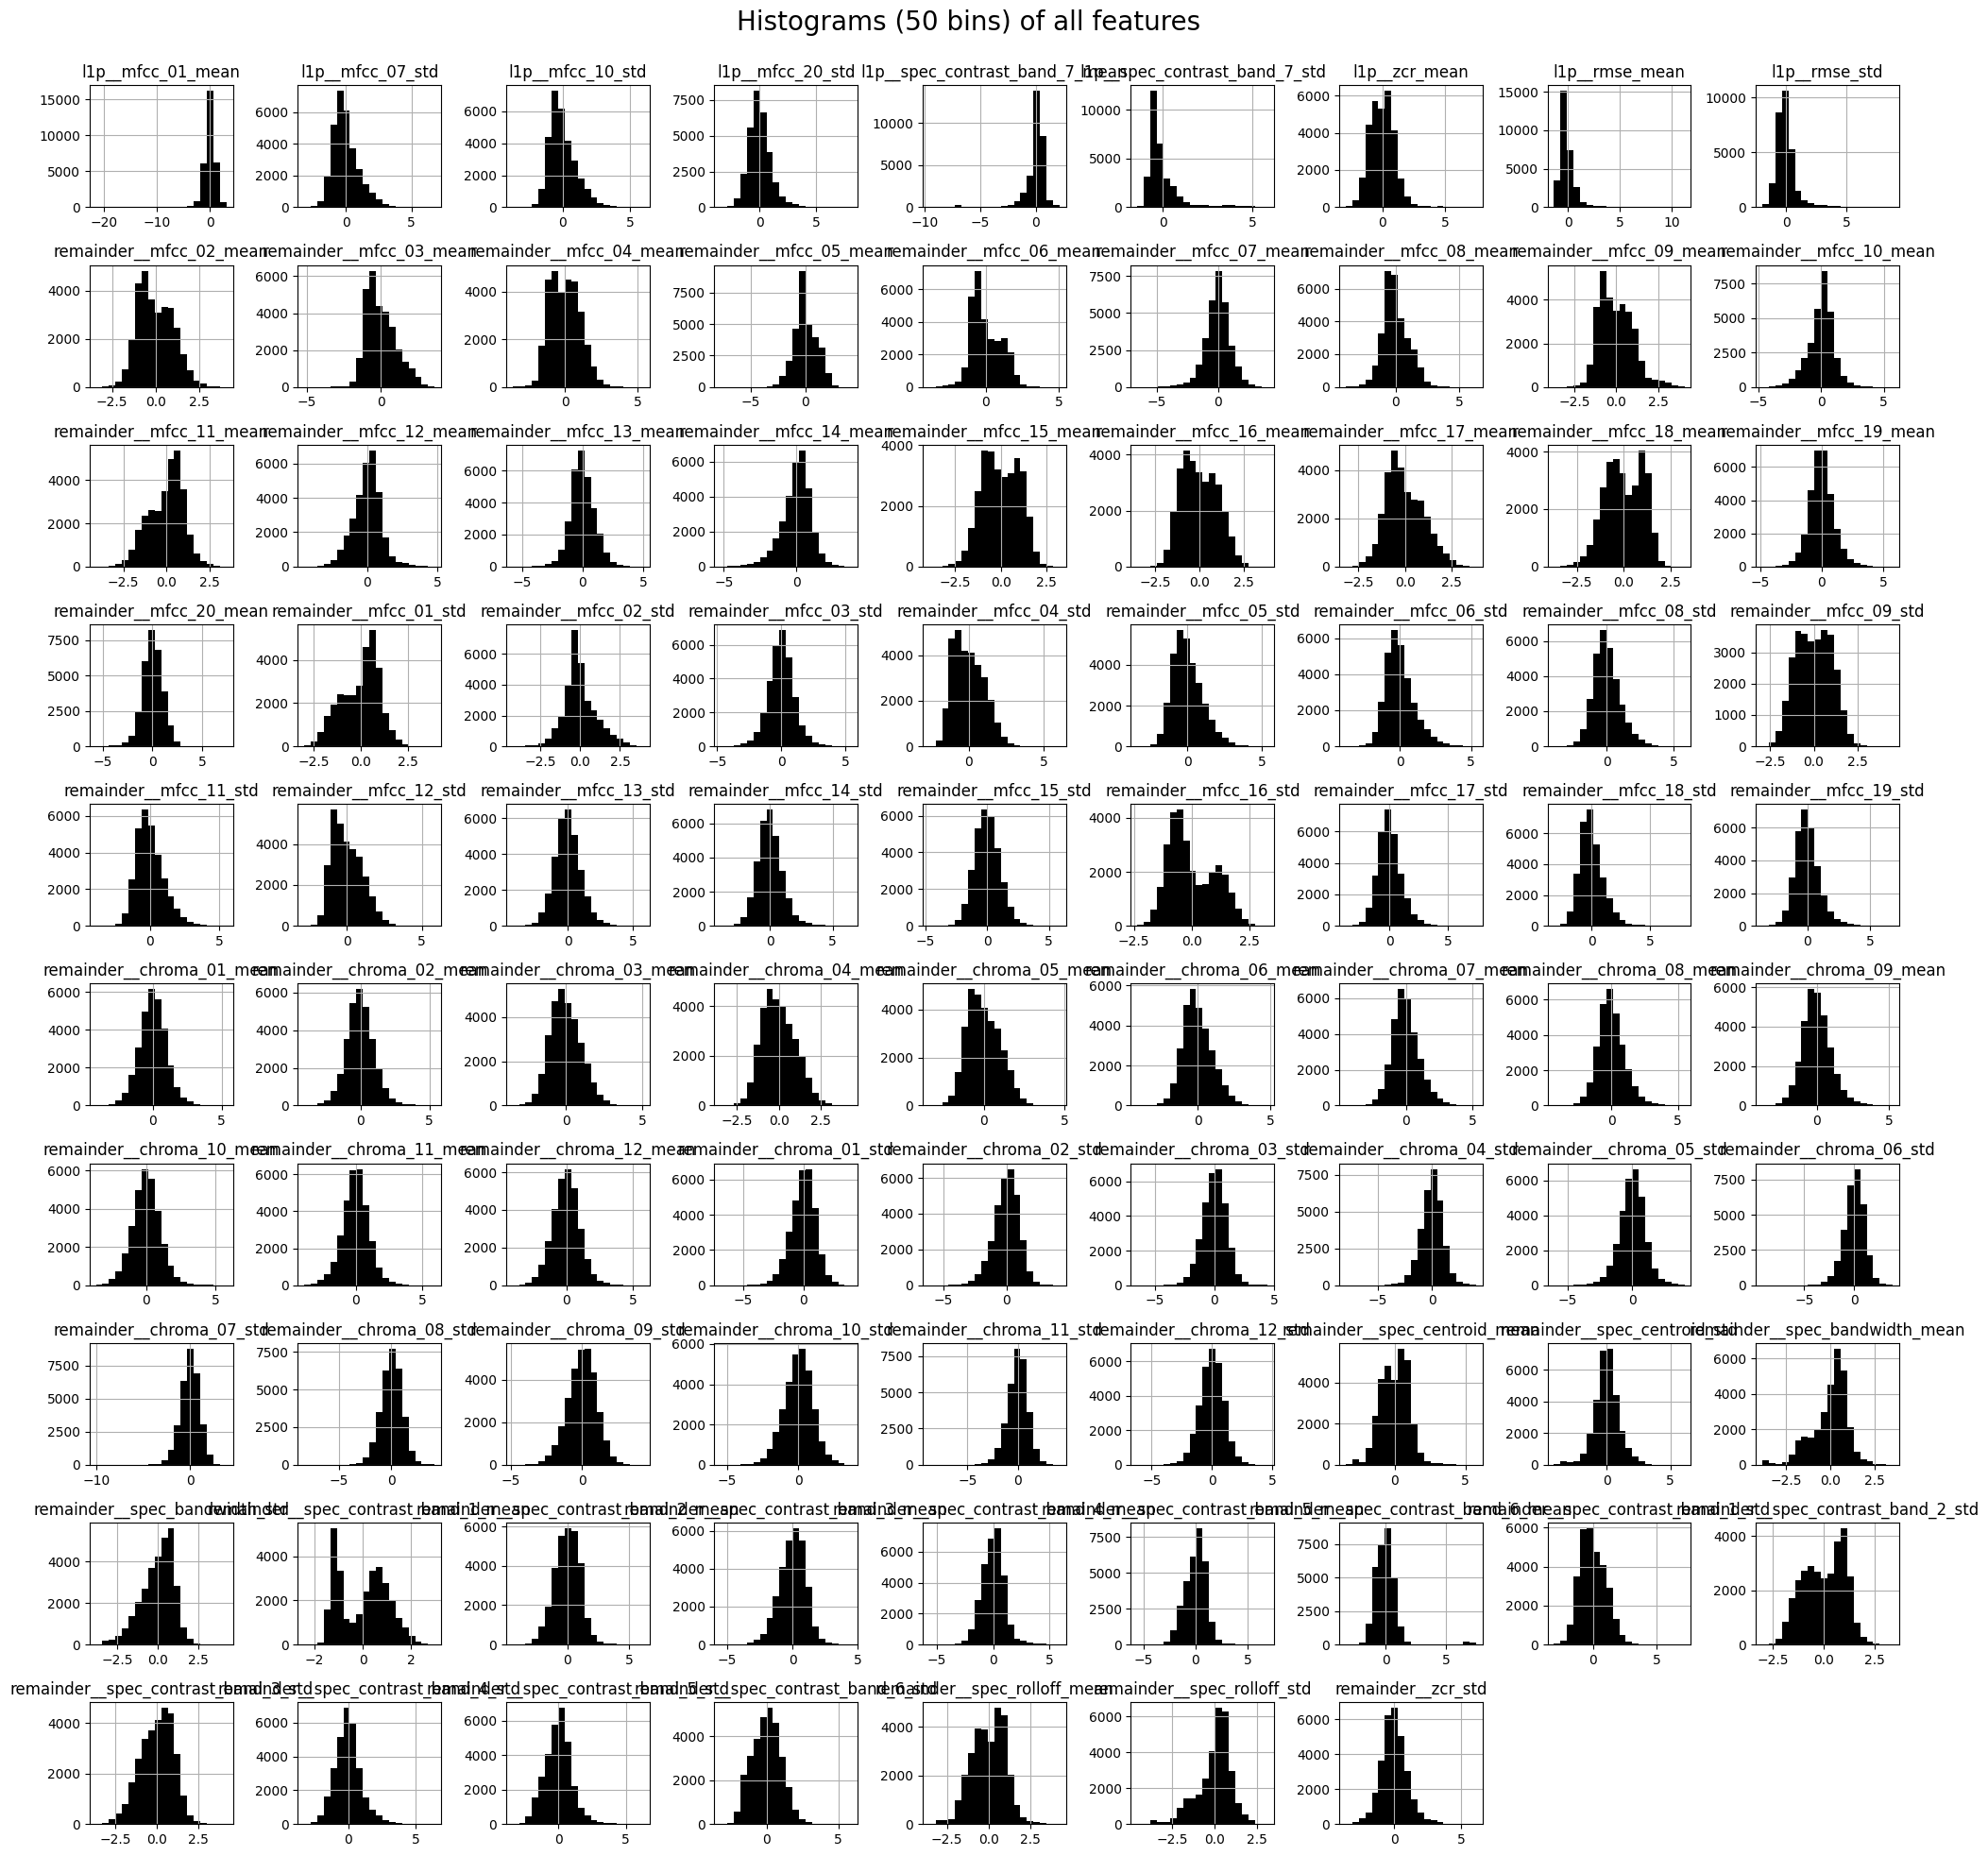

In [20]:
df = pd.DataFrame(preprocessed, columns=features)
df.head()
histograms(df)

Classification Report:
                 precision    recall  f1-score   support

female_feminine       0.99      0.99      0.99     19367
 male_masculine       0.98      0.98      0.98     11078

       accuracy                           0.99     30445
      macro avg       0.99      0.99      0.99     30445
   weighted avg       0.99      0.99      0.99     30445

Confusion Matrix:


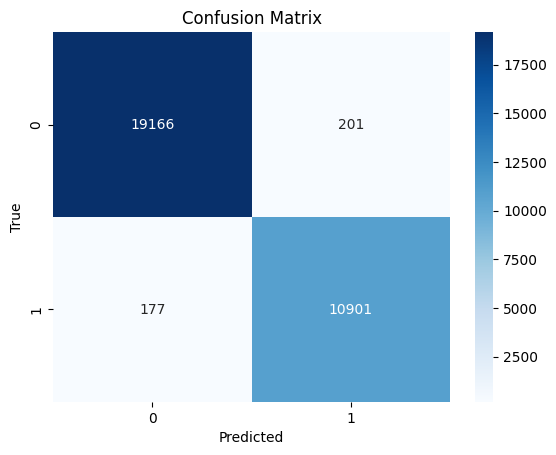

In [49]:
# usage

pipeline_logistic_regression = make_pipeline(preprocessing, LogisticRegression(max_iter=1000))
logistic_regression = pipeline_logistic_regression.fit(X_train, y_train)
prd_lin_reg = pipeline_logistic_regression.predict(X_train)

# Evaluation
# comment Heinrich: seems to be absolutely overfitting
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_model(y_true, y_pred):
    """
    Function to evaluate the model
    :param y_true: true labels
    :param y_pred: predicted labels
    :return: None
    """
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    
    print("Confusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
evaluate_model(y_train, prd_lin_reg)



Classification Report:
                 precision    recall  f1-score   support

female_feminine       0.62      1.00      0.77      4050
 male_masculine       0.00      0.00      0.00      2475

       accuracy                           0.62      6525
      macro avg       0.31      0.50      0.38      6525
   weighted avg       0.39      0.62      0.48      6525

Confusion Matrix:


c:\Users\danie\anaconda3\envs\tensorflow\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\danie\anaconda3\envs\tensorflow\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\danie\anaconda3\envs\tensorflow\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

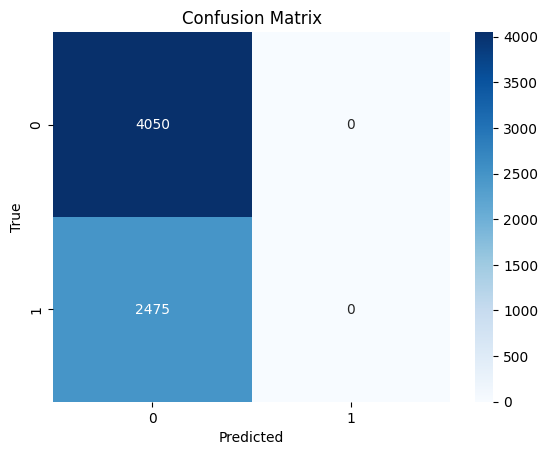

In [51]:
evaluate_model(y_val, pipeline_logistic_regression.predict(X_val))

Classification Report:
                 precision    recall  f1-score   support

female_feminine       0.00      0.00      0.00      4125
 male_masculine       0.37      1.00      0.54      2399

       accuracy                           0.37      6524
      macro avg       0.18      0.50      0.27      6524
   weighted avg       0.14      0.37      0.20      6524

Confusion Matrix:


c:\Users\danie\anaconda3\envs\tensorflow\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\danie\anaconda3\envs\tensorflow\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\danie\anaconda3\envs\tensorflow\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

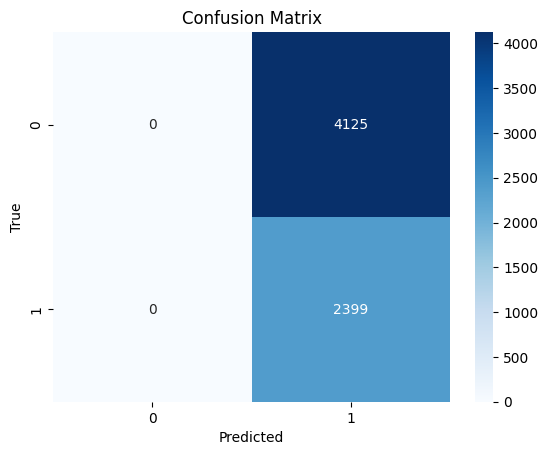

In [52]:
evaluate_model(y_test, pipeline_logistic_regression.predict(X_test))

In [ ]:
def listen_to_misclassified(data, labels, predictions, n):
    """
    Function to listen to misclassified audio files
    :param data: DataFrame
    :param labels: true labels
    :param predictions: predicted labels
    :param n: number of audio files to listen to
    :return: None
    """
    j=0
    pred = pd.Series(predictions, index=labels.index)
    for i in labels.index:
        
        if labels[i] != pred[i] and pred[i]=="male_masculine":
            j+=1
            if j>n//2:
                break
            winsound.Beep(1000, 200)
            playsound.playsound(data.loc[i, "path"])
    
    winsound.Beep(1000, 800)
    winsound.Beep(2000, 400)
    winsound.Beep(1000, 200)
    
    for i in labels.index:
        if labels[i] != pred[i] and pred[i]=="female_feminine":
            j+=1
            if j>n:
                break
            winsound.Beep(1000, 200)
            playsound.playsound(data.loc[i, "path"])
            
    winsound.Beep(1000, 800)
    winsound.Beep(1000, 800)
    
    
        
listen_to_misclassified(data_raw, y_train, prd_lin_reg, 20)
    
